# Index

1. [Modules](#Modules)
2. [Setting styles](#Setting-styles)
3. [Colors](#Colors)
4. [Customizing with matplotlib](#Customizing-with-matplotlib)
5. [Categorical plot types](#Categorical-plot-types)
6. [Matrix plots](#Matrix-plots)
7. [Pairplot](#Pairplot)
8. [Jointplot](#Jointplot)
9. [Regression plots](#Regression-plots)

# Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('set/ltc_usd.csv', index_col='Date').loc[::-1]

In [3]:
df.head(2)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
"Jan 16, 2018",192.99,255.00,255.22,170.91,33.23K,-24.32%
"Jan 17, 2018",197.01,192.99,199.98,148.95,39.12K,2.08%


In [4]:
df.shape

(432, 6)

In [5]:
float_format = lambda x: float(x.replace('K', '0').replace('M', '0000').replace('.', ''))

In [6]:
float_per = lambda x: float(x.replace('%', ''))

In [7]:
df['new_vol'] = df['Vol.'].apply(float_format)

In [8]:
df['change_per'] = df['Change %'].apply(float_per)

In [9]:
df.head(2)

,Price,Open,High,Low,Vol.,Change %,new_vol,change_per
Date,,,,,,,,
"Jan 16, 2018",192.99,255.00,255.22,170.91,33.23K,-24.32%,33230.0,-24.32
"Jan 17, 2018",197.01,192.99,199.98,148.95,39.12K,2.08%,39120.0,2.08


# Setting styles

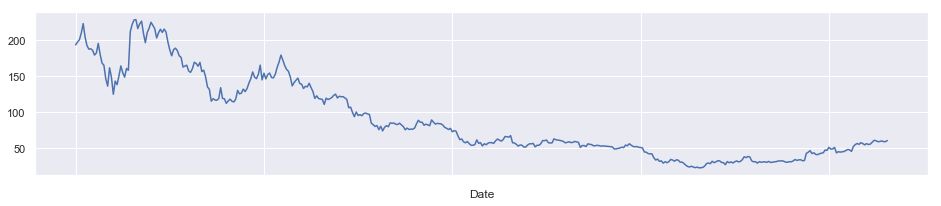

In [10]:
sns.set()
plt.figure(figsize=(16, 3))
df.Price.plot()
plt.show()

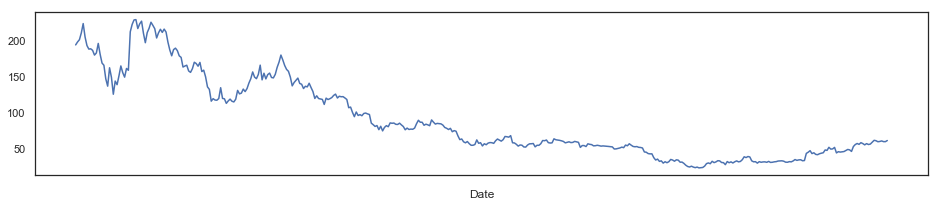

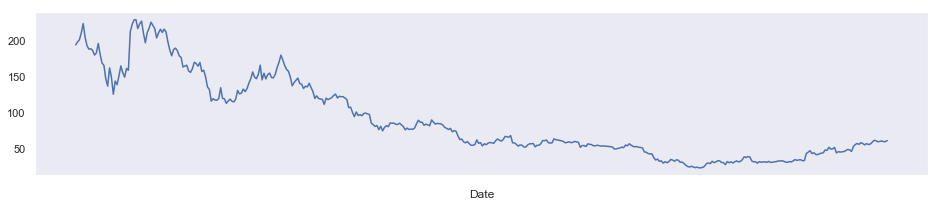

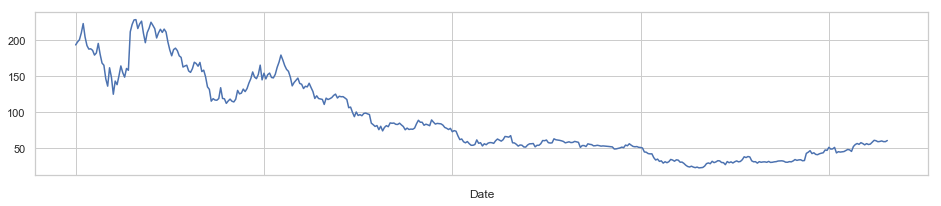

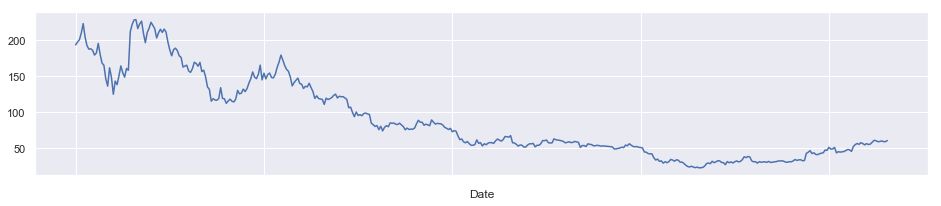

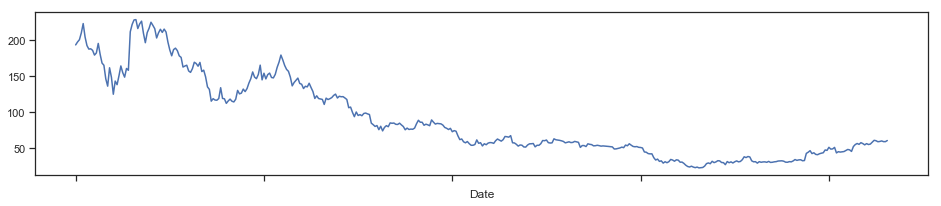

In [11]:
for style in ['white', 'dark', 'whitegrid', 'darkgrid', 'ticks']:
    
    plt.figure(figsize=(16, 3))
    sns.set_style(style)
    df.Price.plot()
    plt.show()

# Colors

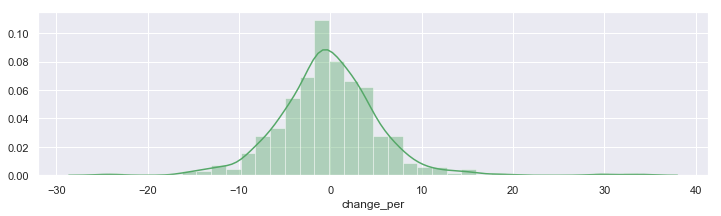

In [11]:
sns.set(color_codes=True)

plt.figure(figsize=(12, 3))
sns.distplot(df.change_per, color='g')
plt.show()

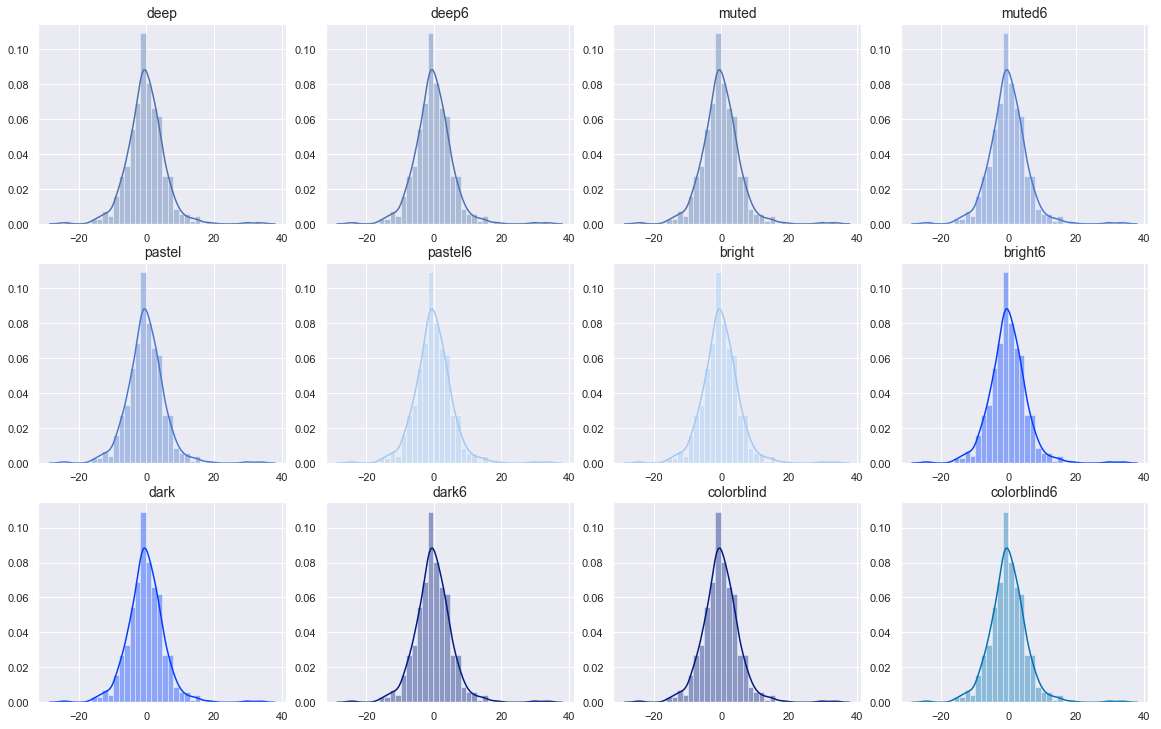

In [12]:
palettes = [i for i in sns.palettes.SEABORN_PALETTES]
plt.figure(figsize=(16, 10))

for i in range(len(palettes)):
    
    plt.subplot(3, 4, i+1)
    sns.set_palette(palettes[i])
    sns.distplot(df.change_per, axlabel=False)
    plt.title(palettes[i], fontsize=14)
    
plt.tight_layout(pad=0.2)
plt.show()
    

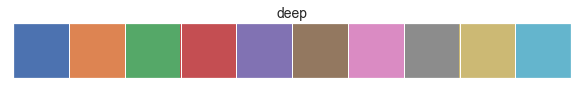

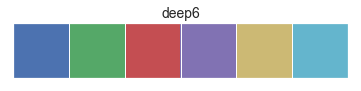

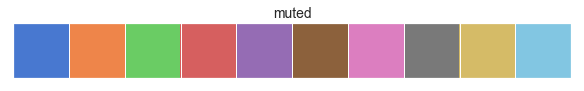

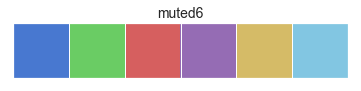

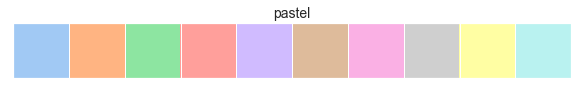

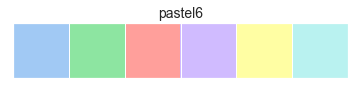

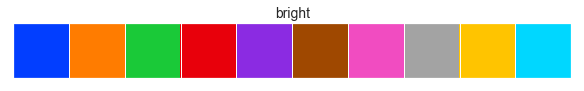

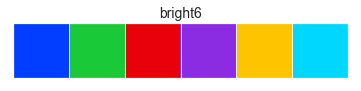

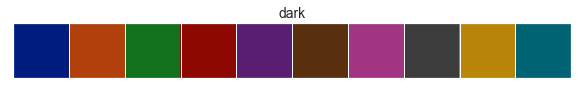

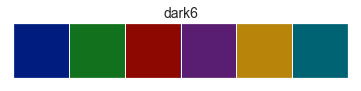

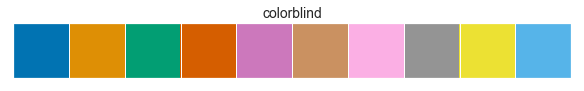

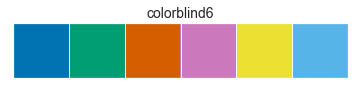

In [13]:
for i in range(len(palettes)):
    sns.set_palette(palettes[i])
    sns.palplot(sns.color_palette())
    plt.title(palettes[i], fontsize=14)
    plt.show()

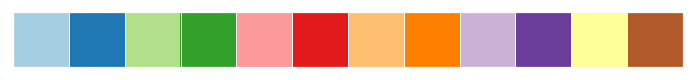

In [14]:
sns.palplot(sns.color_palette('Paired', 12))

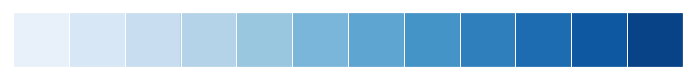

In [15]:
sns.palplot(sns.color_palette('Blues', 12))

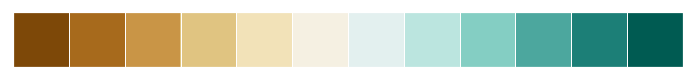

In [16]:
sns.palplot(sns.color_palette('BrBG', 12))

# Customizing with matplotlib

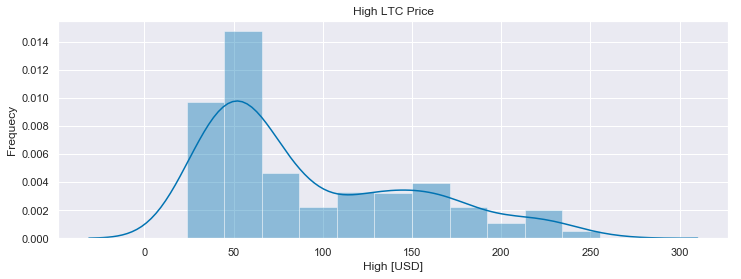

In [17]:
fig, ax = plt.subplots(figsize=(12,4))
sns.distplot(df.High, ax=ax)
ax.set(xlabel='High [USD]', ylabel='Frequecy', title='High LTC Price')
plt.show()

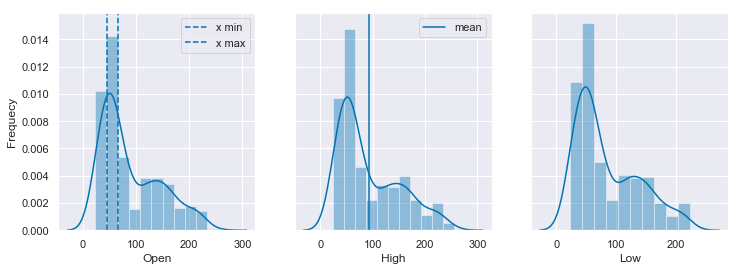

In [18]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
sns.distplot(df.Open, ax=ax0)
sns.distplot(df.High, ax=ax1)
sns.distplot(df.Low, ax=ax2)
ax0.set(ylabel='Frequecy')
ax0.axvline(x=45, label='x min', linestyle='--')
ax0.axvline(x=65, label='x max', linestyle='--')
ax1.axvline(x=df.High.mean(), label='mean', linestyle='-')
ax0.legend()
ax1.legend()
plt.show()

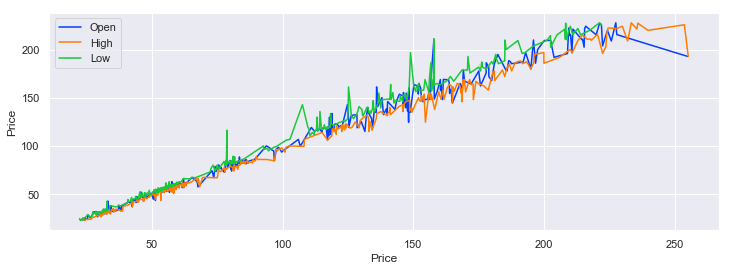

In [19]:
sns.set_palette('bright')
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(x=df.Open, y=df.Price, ax=ax, label='Open')
sns.lineplot(x=df.High, y=df.Price, ax=ax, label='High')
sns.lineplot(x=df.Low, y=df.Price, ax=ax, label='Low')

ax.set(xlabel='Price', ylabel='Price')
plt.show()

# Categorical plot types

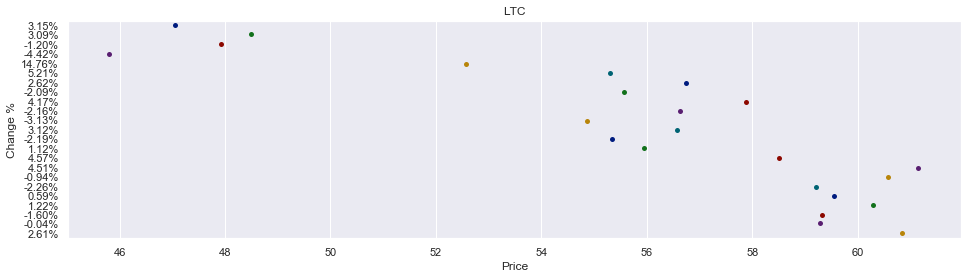

In [20]:
df_sam = df.loc['Mar 01, 2019': 'Mar 23, 2019']
fig, ax = plt.subplots(figsize=(16, 4))
sns.stripplot(data=df_sam, x='Price', y='Change %', jitter=True, ax=ax, palette='dark6')
ax.set(title='LTC')
plt.show()

# Matrix plots

In [35]:
import numpy as np
cm = pd.crosstab(np.array([1, 1, 0, 0]), np.array([1, 1, 1, 0]), rownames=['y_true'], colnames=['y_predicted'])
#print("Confusion matrix:\n %s \n" % cm)
cm['sum'] = cm[0] + cm[1]
cm['0 [%]'] = (cm[0] / cm['sum'])*100
cm['1 [%]'] = (cm[1] / cm['sum'])*100
print("percentage confusion matrix:\n %s" % cm)

percentage confusion matrix:
 y_predicted  0  1  sum  0 [%]  1 [%]
y_true                              
0            1  1    2   50.0   50.0
1            0  2    2    0.0  100.0


In [37]:
cm = pd.crosstab(np.array([1, 1, 0, 0]), np.array([1, 1, 1, 0]), rownames=['y_true'], colnames=['y_predicted'])

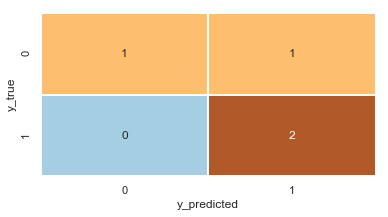

In [61]:
plt.figure(figsize=(6, 3))
sns.heatmap(cm, annot=True, linewidths=0.7, cbar=False, cmap='Paired')
plt.show()

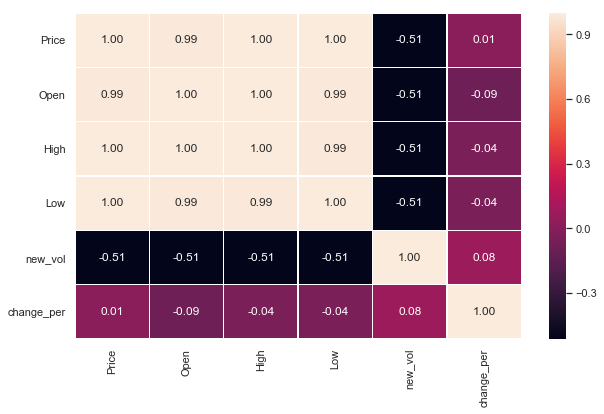

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price', 'Open', 'High', 'Low', 'new_vol', 'change_per']].corr('pearson'), 
            annot=True, 
            fmt=".2f", 
            linewidths=0.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

## Pairplot

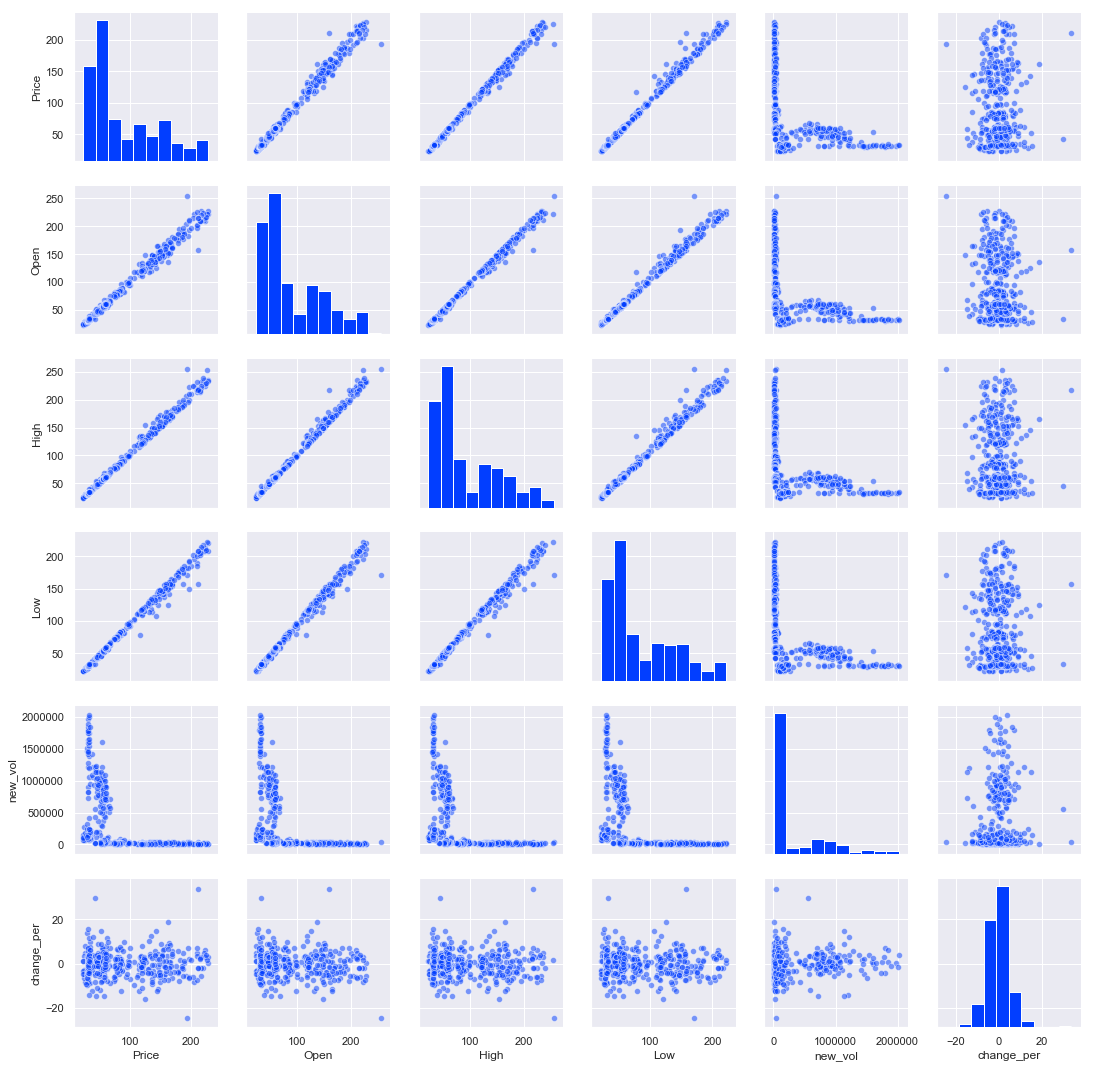

In [70]:
sns.pairplot(df, plot_kws={'alpha': 0.5})
plt.show()

# Jointplot

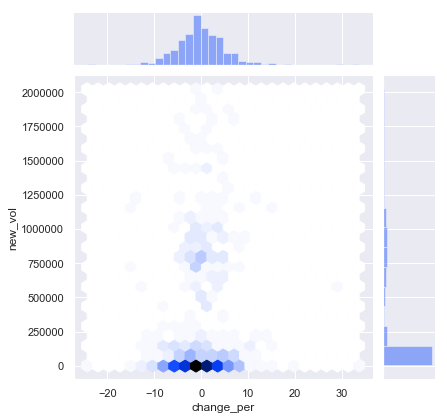

In [76]:
sns.jointplot(data=df, x='change_per', y='new_vol', kind='hex')
plt.show()

# Barplot

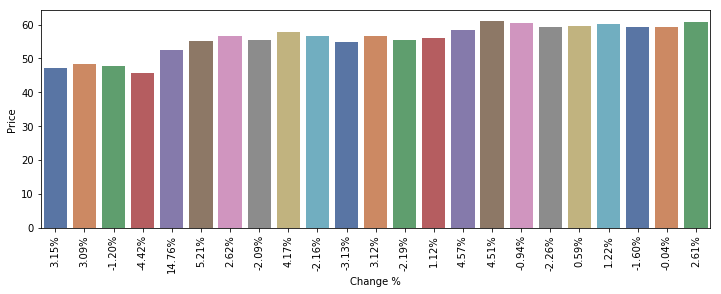

In [45]:
df_sam = df.loc['Mar 01, 2019': 'Mar 23, 2019']
plt.figure(figsize=(12, 4))
sns.barplot(df_sam['Change %'], df_sam.Price, palette='deep')
plt.xticks(rotation=90)
plt.show()

# Regression plots

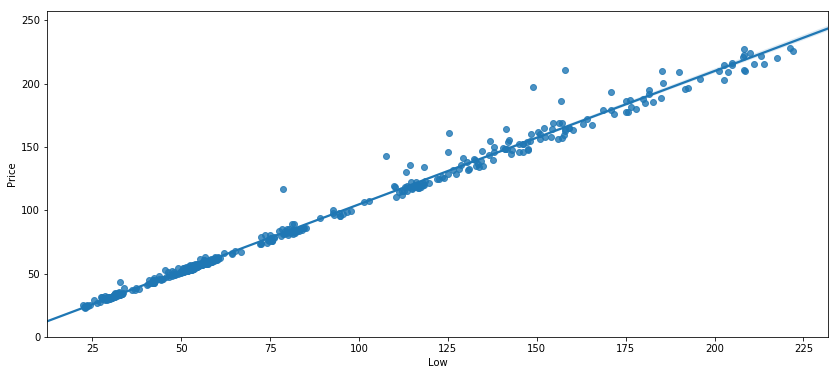

In [49]:
plt.figure(figsize=(14, 6))
sns.regplot(x='Low', y='Price', data=df)
plt.show()

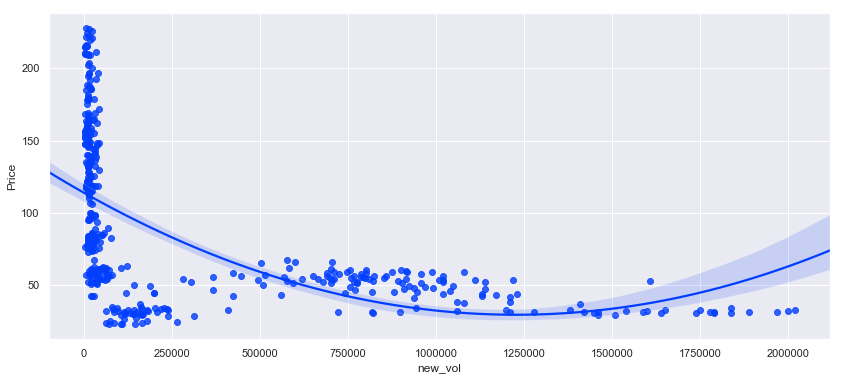

In [26]:
plt.figure(figsize=(14, 6))
sns.regplot(x='new_vol', y='Price', data=df, order=2)
plt.show()

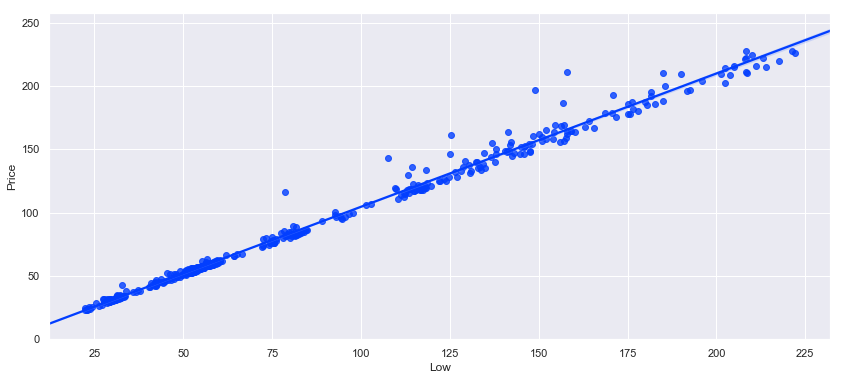

In [22]:
plt.figure(figsize=(14, 6))
sns.regplot(x='Low', y='Price', data=df)
plt.show()

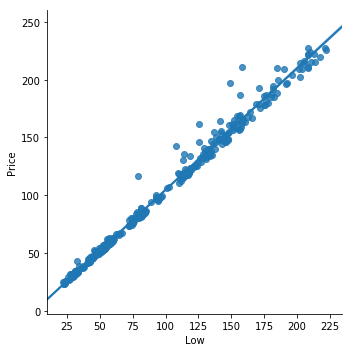

In [100]:
#plt.figure(figsize=(14, 6))
sns.lmplot(x='Low', y='Price', data=df)
plt.show()